# Ways to Detect and Remove the Outliers

While working on a Data Science project, what is it, that you look for? What is the most important part of the EDA phase? There are certain things which, if are not done in the EDA phase, can affect further statistical/Machine Learning modelling. One of them is finding “Outliers”. In this post we will try to understand what is an outlier? Why is it important to identify the outliers? What are the methods to outliers? Don’t worry, we won’t just go through the theory part but we will do some coding and plotting of the data too.

Credit: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

run
- pip uninstall -y scikit-learn
- pip install scikit-learn == 1.0.2

or
- pip install --upgrade scikit-learn==1.0.2

In [ ]:
!pip install --upgrade scikit-learn==1.0.2

In [ ]:
#Import the libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_boston, load_iris
sklearn.__version__

'1.0.2'

In [ ]:
#Load the data
print("you must use sklearn version 1.0.2 in order to run this!")
import warnings
warnings.filterwarnings('ignore')
boston = load_boston()

#Find features and target
x = boston.data
y = boston.target

#Find the dic keys
print(boston.keys())

you must use sklearn version 1.0.2 in order to run this!
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [ ]:
#find features name
columns = boston.feature_names
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
#Description of dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
#Create dataframe
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df_o = boston_df
boston_df.shape

(506, 13)

In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


<Axes: xlabel='DIS'>

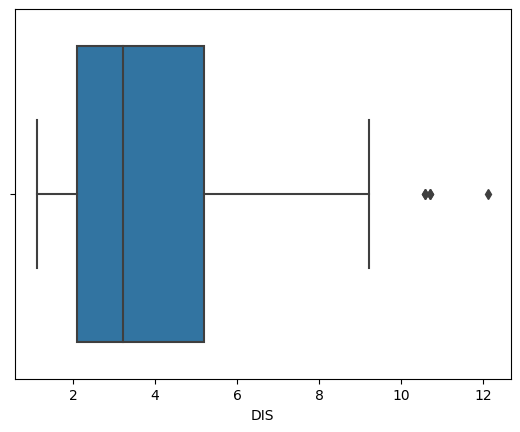

In [ ]:
# Check1: Oulier detection - Univarite - Boxplot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.boxplot(x=boston_df['DIS'])

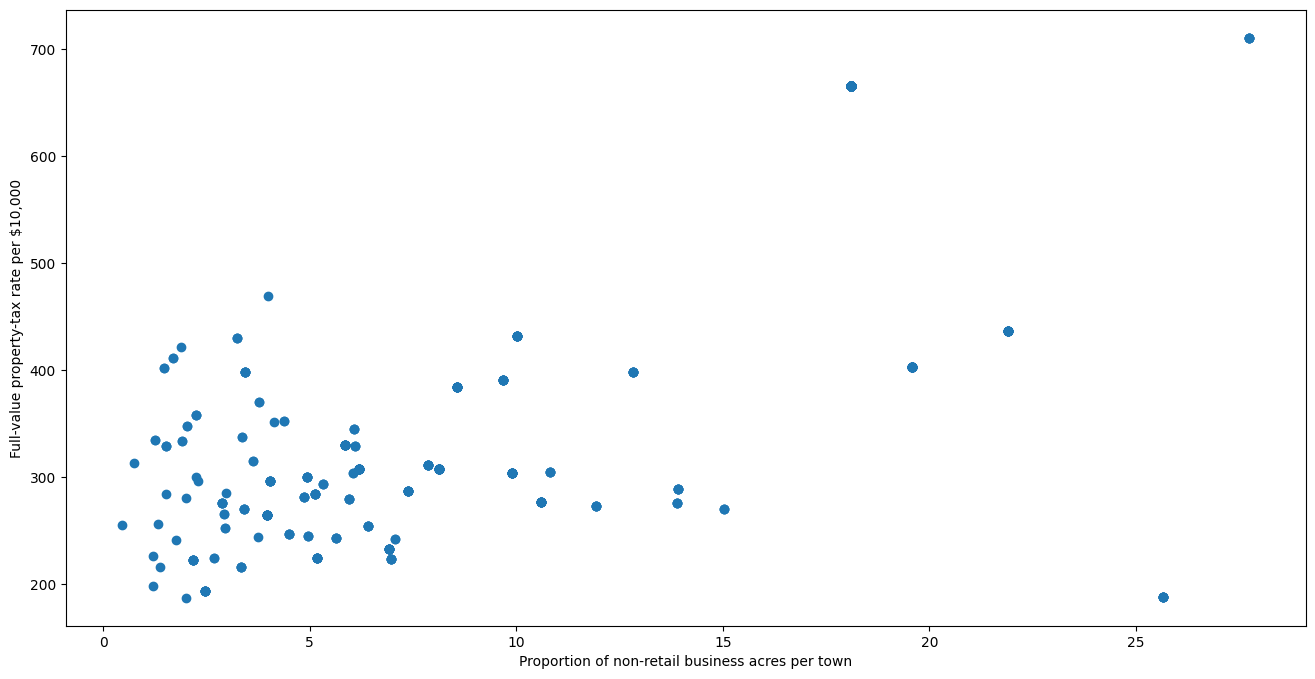

In [ ]:
# Check2: Multivariate outlier analysis
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(boston_df['INDUS'], boston_df['TAX'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [ ]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(boston_df))
z

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.419782,0.284830,1.287909,0.272599,0.144217,0.413672,0.120013,0.140214,0.982843,0.666608,1.459000,0.441052,1.075562
1,0.417339,0.487722,0.593381,0.272599,0.740262,0.194274,0.367166,0.557160,0.867883,0.987329,0.303094,0.441052,0.492439
2,0.417342,0.487722,0.593381,0.272599,0.740262,1.282714,0.265812,0.557160,0.867883,0.987329,0.303094,0.396427,1.208727
3,0.416750,0.487722,1.306878,0.272599,0.835284,1.016303,0.809889,1.077737,0.752922,1.106115,0.113032,0.416163,1.361517
4,0.412482,0.487722,1.306878,0.272599,0.835284,1.228577,0.511180,1.077737,0.752922,1.106115,0.113032,0.441052,1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.413229,0.487722,0.115738,0.272599,0.158124,0.439316,0.018673,0.625796,0.982843,0.803212,1.176466,0.387217,0.418147
502,0.415249,0.487722,0.115738,0.272599,0.158124,0.234548,0.288933,0.716639,0.982843,0.803212,1.176466,0.441052,0.500850
503,0.413447,0.487722,0.115738,0.272599,0.158124,0.984960,0.797449,0.773684,0.982843,0.803212,1.176466,0.441052,0.983048
504,0.407764,0.487722,0.115738,0.272599,0.158124,0.725672,0.736996,0.668437,0.982843,0.803212,1.176466,0.403225,0.865302


In [ ]:
z.shape

(506, 13)

In [ ]:
threshold = 3
print(np.where(z > 3)) # show row & columns

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

## Removing "whole rows" with outliers


In [ ]:
boston_df_o = boston_df_o[(z <= 3).all(axis=1)]

In [ ]:
boston_df.shape

(506, 13)

In [ ]:
boston_df_o.shape

(415, 13)

In [ ]:
boston_df_o1 = boston_df

In [ ]:
Q1 = boston_df_o1.quantile(0.25)
Q3 = boston_df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

boston_df_out = boston_df_o1[~((boston_df_o1 < (Q1 - 1.5 * IQR)) | (boston_df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


In [ ]:
boston_df_out.shape

(274, 13)